In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [458]:
#Read the Planned Induction data
Planned_Induction = pd.read_csv("C:\\Users\\maste\\OneDrive\\Desktop\\44688\\raw_data\\MWS.csv")

#Read the OH Plant Stock data
OH_Plant_Stock = pd.read_csv("C:\\Users\\maste\\OneDrive\\Desktop\\44688\\raw_data\\OH Plant Stock.csv")

#Read the Plant List data
Plant_List = pd.read_csv("C:\\Users\\maste\\OneDrive\\Desktop\\44688\\raw_data\\Plant List.csv")

#Read the LRC data
LRC = pd.read_csv("C:\\Users\\maste\\OneDrive\\Desktop\\44688\\raw_data\\LRC.csv")

In [459]:
Planned_Induction.head()

,Master Work Schedule Log (UNCLASSIFIED),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,(Mon Mar 18 09:02:23 EDT 2024),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,for Workload Year 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,for SAC 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,for Status 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Prior,Current,Oct,Nov,Dec,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan


In [460]:
# Redefine the Header
headers = Planned_Induction.iloc[4]
Planned_Induction  = pd.DataFrame(Planned_Induction.values[1:], columns=headers)

In [461]:
Planned_Induction.head()

4,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Prior,Current,Oct,Nov,Dec,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan
0,for Workload Year 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,for SAC 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,for Status 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Prior,Current,Oct,Nov,Dec,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan
4,NaN,NaN,NaN,NaN,NaN,502,798,40,37,21,...,63,102,79,77,76,66,25,25,25,25


In [462]:
#Remove First 4 Rows
Planned_Induction = Planned_Induction.iloc[4:]

In [463]:
#Show First 5 Rows
Planned_Induction.head()

4,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Prior,Current,Oct,Nov,Dec,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan
4,NaN,NaN,NaN,NaN,NaN,502,798,40,37,21,...,63,102,79,77,76,66,25,25,25,25
5,C768,PPA,1240015541735,E0846,Thermal Elbow Assembly TSS,84,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,D009,PPB,5895015525616,A0123,"Console, Communications",8,15,12,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,D046,PPA,5820200058054,A0153,"Receiver-Transmitter, Radio",192,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,D052,PPA,5998011423769,A2179,Electronic Component,12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [464]:
#Remove Columns
Planned_Induction = Planned_Induction.drop(columns=['Prior', 'Current'])

In [465]:
#Show First 5 Rows
Planned_Induction.head()

4,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Oct,Nov,Dec,Jan,Feb,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan
4,NaN,NaN,NaN,NaN,NaN,40,37,21,57,16,...,63,102,79,77,76,66,25,25,25,25
5,C768,PPA,1240015541735,E0846,Thermal Elbow Assembly TSS,NaN,NaN,NaN,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,D009,PPB,5895015525616,A0123,"Console, Communications",12,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,D046,PPA,5820200058054,A0153,"Receiver-Transmitter, Radio",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,D052,PPA,5998011423769,A2179,Electronic Component,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [466]:
#Replace Blank Values with 0
Planned_Induction = Planned_Induction.replace(np.nan, 0)

In [467]:
#Show First 5 Rows
Planned_Induction.head()

4,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Oct,Nov,Dec,Jan,Feb,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan
4,0,0,0,0,0,40,37,21,57,16,...,63,102,79,77,76,66,25,25,25,25
5,C768,PPA,1240015541735,E0846,Thermal Elbow Assembly TSS,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
6,D009,PPB,5895015525616,A0123,"Console, Communications",12,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,D046,PPA,5820200058054,A0153,"Receiver-Transmitter, Radio",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,D052,PPA,5998011423769,A2179,Electronic Component,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [468]:
#Remove the Jan 2025 Column
Planned_Induction = Planned_Induction.iloc[:, :-1]

In [469]:
#Display the first 5 rows
Planned_Induction.head()

4,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4,0,0,0,0,0,40,37,21,57,16,64,63,102,79,77,76,66,25,25,25
5,C768,PPA,1240015541735,E0846,Thermal Elbow Assembly TSS,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0
6,D009,PPB,5895015525616,A0123,"Console, Communications",12,3,0,0,0,0,0,0,0,0,0,0,0,0,0
7,D046,PPA,5820200058054,A0153,"Receiver-Transmitter, Radio",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,D052,PPA,5998011423769,A2179,Electronic Component,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [470]:
#Unpivot Month columns
Planned_Induction = Planned_Induction.melt(id_vars=['MWSLIN', 'SOR', 'NSN', 'TAMCN', 'NOMENCLATURE'], var_name='Month', value_name='Qty')


In [471]:
#Display Planned Induction data
Planned_Induction

,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Month,Qty
0,0,0,0,0,0,Oct,40
1,C768,PPA,1240015541735,E0846,Thermal Elbow Assembly TSS,Oct,0
2,D009,PPB,5895015525616,A0123,"Console, Communications",Oct,12
3,D046,PPA,5820200058054,A0153,"Receiver-Transmitter, Radio",Oct,0
4,D052,PPA,5998011423769,A2179,Electronic Component,Oct,0
...,...,...,...,...,...,...,...
820,R479,PPA,6675002932930,0,Clinometers,Dec,0
821,R480,PPA,4933001441857,0,"Fixture, Checking, Guide Bar Housing",Dec,0
822,R497,PPA,4920011063361,0,"Fixture, Aircraft Maintenance",Dec,0
823,V413,PPA,6625014962745,0,Multiproduct Calibrator,Dec,0


In [472]:
#Remove the Top Row in the dataframe
Planned_Induction = Planned_Induction.iloc[1:]

In [473]:
Planned_Induction

,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Month,Qty
1,C768,PPA,1240015541735,E0846,Thermal Elbow Assembly TSS,Oct,0
2,D009,PPB,5895015525616,A0123,"Console, Communications",Oct,12
3,D046,PPA,5820200058054,A0153,"Receiver-Transmitter, Radio",Oct,0
4,D052,PPA,5998011423769,A2179,Electronic Component,Oct,0
5,D081,PPA,6625014778172,A7420,"Generator, Function, Electronic :33250A",Oct,0
...,...,...,...,...,...,...,...
820,R479,PPA,6675002932930,0,Clinometers,Dec,0
821,R480,PPA,4933001441857,0,"Fixture, Checking, Guide Bar Housing",Dec,0
822,R497,PPA,4920011063361,0,"Fixture, Aircraft Maintenance",Dec,0
823,V413,PPA,6625014962745,0,Multiproduct Calibrator,Dec,0


In [474]:
#Display the Number of rows and columns
Planned_Induction.shape

(824, 7)

In [475]:
#Display Basic Statistics
Planned_Induction.describe()

,MWSLIN,SOR,NSN,TAMCN,NOMENCLATURE,Month,Qty
count,824,824,824,824,824,824,824
unique,53,4,43,23,41,12,24
top,D755,PPA,7025016473875,E0671,"Engine, Diesel",Nov,0
freq,30,510,45,180,60,110,714


In [476]:
#Find Unique data
Planned_Induction.nunique()

MWSLIN          53
SOR              4
NSN             43
TAMCN           23
NOMENCLATURE    41
Month           12
Qty             24
dtype: int64

In [477]:
print(Planned_Induction.isnull().sum())

MWSLIN          0
SOR             0
NSN             0
TAMCN           0
NOMENCLATURE    0
Month           0
Qty             0
dtype: int64


In [478]:
pd.to_numeric(Planned_Induction["Qty"])

1       0
2      12
3       0
4       0
5       0
       ..
820     0
821     0
822     0
823     0
824     0
Name: Qty, Length: 824, dtype: int64

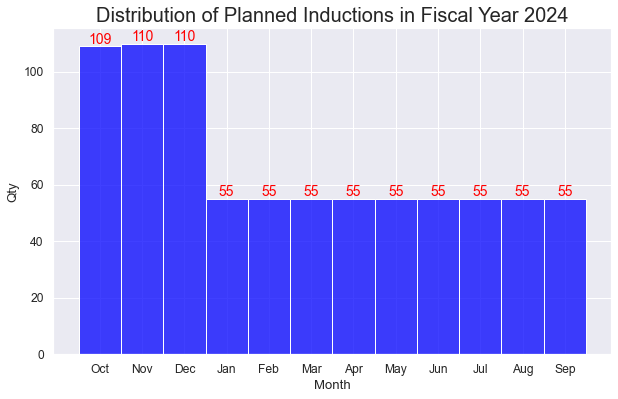

In [479]:
plt.figure(figsize=(10, 6))
sns.histplot(data=Planned_Induction, x='Month', bins=30, color='blue')
plt.title('Distribution of Planned Inductions in Fiscal Year 2024',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Qty')
plt.grid(True)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='red', ha='center', va='bottom')
plt.show()

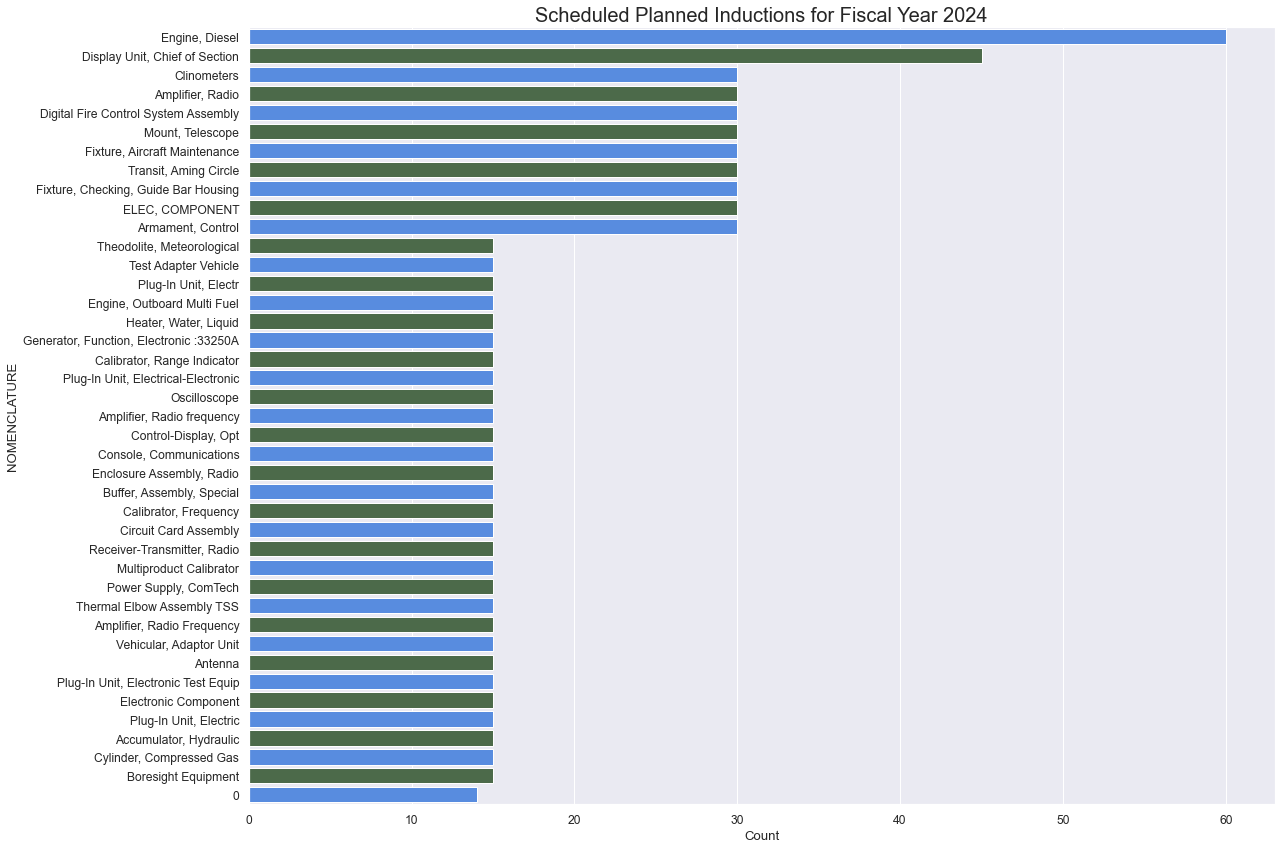

In [363]:

plt.figure(figsize=(18, 12)) 
sns.set(font_scale=1.1) 
sns.countplot(data=Planned_Induction, palette=['#4287f5',"#487044"], y='NOMENCLATURE', order = Planned_Induction['NOMENCLATURE'].value_counts().index)
plt.title('Scheduled Planned Inductions for Fiscal Year 2024',fontsize=20)
plt.xlabel('Count')
plt.ylabel('NOMENCLATURE')
plt.tight_layout()

plt.show()